(array([345.,   7.,   2.,   3.,   2.,   0.,   2.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0.        ,  13.42847794,  26.85695589,  40.28543383,
         53.71391178,  67.14238972,  80.57086766,  93.99934561,
        107.42782355, 120.8563015 , 134.28477944, 147.71325738,
        161.14173533, 174.57021327, 187.99869121, 201.42716916,
        214.8556471 , 228.28412505, 241.71260299, 255.14108093,
        268.56955888, 281.99803682, 295.42651477, 308.85499271,
        322.28347065, 335.7119486 , 349.14042654, 362.56890449,
        375.99738243, 389.42586037, 402.85433832]),
 <BarContainer object of 30 artists>)

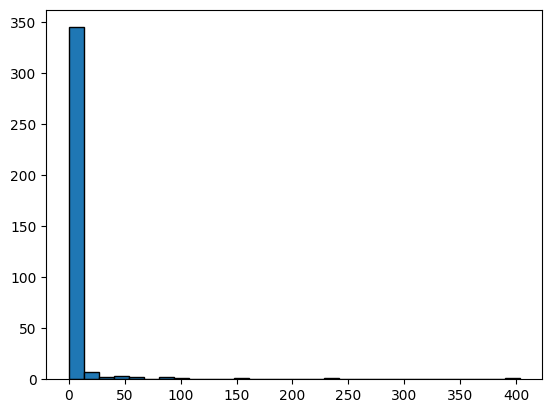

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# create a rainfall mm vector of data, from lognormal distribution
rainfall = np.random.lognormal(0, 2.5, 100)
rainfall = np.concatenate([rainfall,(np.zeros(265))])
np.random.shuffle(rainfall)
plt.hist(rainfall, bins=30, edgecolor='black')



fiv numbers: [0.00000000e+00 0.00000000e+00 0.00000000e+00 9.90112521e-04
 1.58604070e+01]


,vol,bin_start,bin_end
0,354.0,0.000000,1.586041
1,5.0,1.586041,3.172081
2,3.0,3.172081,4.758122
3,1.0,4.758122,6.344163
4,0.0,6.344163,7.930204
5,1.0,7.930204,9.516244
6,0.0,9.516244,11.102285
7,0.0,11.102285,12.688326
8,0.0,12.688326,14.274366
9,1.0,14.274366,15.860407


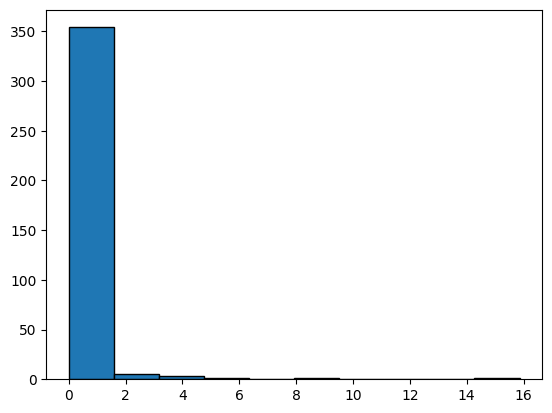

In [35]:
inches = rainfall / 25.4
# fiv number
print("fiv numbers:",
        np.percentile(inches, [0, 25, 50, 75, 100]))
vol, cuts, _ = plt.hist(inches, bins=10, edgecolor='black')
import pandas as pd
df = pd.DataFrame({'vol':vol, 'bin_start':cuts[:-1], 'bin_end':cuts[1:]})
df


In [36]:
# ufunc
x = np.array([1, 2, 3, 4, 5])
print(x >= 3)
print(np.greater_equal(x, 3))

[False False  True  True  True]
[False False  True  True  True]


In [37]:
# usage on arrays: along axis, bitwise ops
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [10]:
np.all(x < 8, axis=1)

array([ True, False,  True])

In [11]:
np.count_nonzero(x < 6, axis=1)

array([4, 2, 2], dtype=int64)

In [38]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

7

In [39]:
print("Rainy days with < 0.1 inches :", np.sum((inches > 0) & (inches < 0.2)))
print("Rainy days with < 0.1 inches :", np.sum(
    np.bitwise_and(inches > 0, inches < 0.2)))


Rainy days with < 0.1 inches : 73
Rainy days with < 0.1 inches : 73


In [40]:
# masks
inches.shape

(365,)

In [41]:
# construct a mask of all rainy days
rainy = (inches > 0)
# construct a mask of all summer days (June 21st is the 172nd day)
summer = (np.arange(365) - 172 < 90) & (np.arange(365) - 172 > 0)
print("Median precip on rainy days in 2014 (inches): ",
 np.median(inches[rainy]))
print("Median precip on summer days in 2014 (inches): ",
 np.median(inches[summer]))
print("Maximum precip on summer days in 2014 (inches): ",
 np.max(inches[summer]))
print("Median precip on non-summer rainy days (inches):",
 np.median(inches[rainy & ~summer]))


Median precip on rainy days in 2014 (inches):  0.033503120389360486
Median precip on summer days in 2014 (inches):  0.0
Maximum precip on summer days in 2014 (inches):  8.999839789675287
Median precip on non-summer rainy days (inches): 0.0273746173015217


### bool vs bitwise

In [46]:
(42 | 59)

59

In [42]:
bin(42 | 59)

'0b111011'

In [48]:
bool(42 | 59)

True

In [50]:
A = np.array([1, 0, 1, 0, 1, 0])
B = np.array([1, 1, 1, 0, 1, 1])
A | B

array([1, 1, 1, 0, 1, 1])

In [51]:
A or B

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()